PRACTICE/ TESTING FILE FOR CODE SNIPPETS

In [1]:
import mysql.connector

class EcommerceInventoryManagementApp:
    def __init__(self):
        self.host = 'localhost'
        self.database = 'brews'
        self.user = 'root'
        self.password = 'AkkiLikki@9799'
        self.connection = None
    

    def connect(self):
        try:
            self.connection = mysql.connector.connect(
            host=self.host,
            database=self.database,
            user=self.user,
            password=self.password
            )
            print("Connected to MySQL Server")
        except mysql.connector.Error as error:
            print("Error while connecting to MySQL:", error)


    def disconnect(self):
        if self.connection.is_connected():
            self.connection.close()
            print("MySQL connection is closed")


    def execute_query(self, query):
        try:
            cursor = self.connection.cursor()
            cursor.execute(query)
            records = cursor.fetchall()
            cursor.close()
            return records
        except mysql.connector.Error as error:
            print("Error executing SQL query:", error)
            return None


    def get_tables(self):
        query = "SHOW TABLES"
        tables = self.execute_query(query)
        if tables:
            return [table[0] for table in tables]
        else:
            return None


if __name__ == "__main__":
    app = EcommerceInventoryManagementApp()
    app.connect()
    # Fetch all tables
#     tables = app.get_tables()
#     if tables:
#         print("Tables in the database:")
#         for table in tables:
#             print(table)
    data = app.execute_query("SELECT * FROM CUSTOMER LIMIT 10")
    print(data)
    app.disconnect()

Error while connecting to MySQL: 1049 (42000): Unknown database 'brew'


AttributeError: 'NoneType' object has no attribute 'cursor'

In [7]:
import json

with open("brew_customer.json", "w") as f:
    json.dump(data, f, indent=4)

In [27]:
import mysql.connector
from mysql.connector import errorcode


config = {
    "host": "localhost",
    "user": "root",
    "password": "AkkiLikki@9799",
    "database": "BREWS",
}

class EcommerceInventoryManagementApp:
    def __init__(self):
        self.connection = None

    def db_read(self, query, params=None):
        try:
            self.connection = mysql.connector.connect(**config)
            cursor = self.connection.cursor(dictionary=True)
            if params:
                cursor.execute(query, params)
            else:
                cursor.execute(query)

            entries = cursor.fetchall()
            cursor.close()
            self.connection.close()

            content = []

            for entry in entries:
                content.append(entry)

            return content

        except mysql.connector.Error as err:
            if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
                print("User authorization error")
            elif err.errno == errorcode.ER_BAD_DB_ERROR:
                print("Database doesn't exist")
            else:
                print(err)

        finally:
            if self.connection.is_connected():
                cursor.close()
                self.connection.close()
                print("Connection closed")

    def list_tables(self):
        query = "SHOW TABLES"
        tables = self.db_read(query)
        if tables:
            return [table["Tables_in_brews"] for table in tables]
        else:
            return None
        
    def describe_table(self, table_name):
        query = f"DESCRIBE TABLE {table_name}"
        response = self.db_read(query)
        return response




if __name__ == "__main__":
    app = EcommerceInventoryManagementApp()
    # Fetch all tables
    # tables = app.get_tables()
    # if tables:
    #     print("Tables in the database:")
    #     for table in tables:
    #         print(table)
    desc = app.describe_table("TRANSACTIONS")
    tables = app.list_tables()


In [28]:
desc

[{'id': 1,
  'select_type': 'SIMPLE',
  'table': 'TRANSACTIONS',
  'partitions': None,
  'type': 'ALL',
  'possible_keys': None,
  'key': None,
  'key_len': None,
  'ref': None,
  'rows': 2000,
  'filtered': 100.0,
  'Extra': None}]

In [29]:
tables

['CUSTOMER',
 'CUSTOMER_VISITS',
 'INVENTORY',
 'PRODUCTS',
 'PRODUCTS_OFFERED',
 'PROMOTIONS',
 'STORE',
 'STORE_INVENTORY',
 'STORE_PROMOTIONS',
 'TRANSACTIONS']

In [3]:
import mysql.connector
from mysql.connector import errorcode

config = {
    "host": "localhost",
    "user": "root",
    "password": "AkkiLikki@9799",
    "database": "BREWS",
}


class RevitalizingBrewsApp:
    def __init__(self):
        self.connection = None

    def db_read(self, query, params=None):
        try:
            self.connection = mysql.connector.connect(**config)
            cursor = self.connection.cursor(dictionary=True)
            if params:
                cursor.execute(query, params)
            else:
                cursor.execute(query)

            entries = cursor.fetchall()
            cursor.close()
            self.connection.close()

            content = []

            for entry in entries:
                content.append(entry)

            return content
        
        except mysql.connector.Error as err:
            if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
                print("User authorization error")
            elif err.errno == errorcode.ER_BAD_DB_ERROR:
                print("Database doesn't exist")
            else:
                print(err)

        finally:
            if self.connection.is_connected():
                cursor.close()
                self.connection.close()
                print("Connection closed")

    def list_tables(self):
        query = "SHOW TABLES"
        tables = self.db_read(query)
        if tables:
            return [table["Tables_in_brews"] for table in tables]
        else:
            return None

    def describe_table(self, table_name):
        query = f"DESCRIBE TABLE {table_name}"
        response = self.db_read(query)
        return response

    def custom_query(self, query):
        print("Executing this query:", query)
        response = self.db_read(query)
        return response
    
    
if __name__ == "__main__":
    app = RevitalizingBrewsApp()
#     desc = app.describe_table("TRANSACTIONS")
#     tables = app.list_tables()

#     print(desc)
#     print(tables)
    tran_query = """
    SELECT t.mode_of_payment AS mode_of_payment, AVG(t.transaction_value) AS average_transaction_value
    FROM TRANSACTIONS t
    JOIN PROMOTIONS p ON t.offer_used = p.offer_id
    WHERE p.offer_id IS NOT NULL
    GROUP BY t.mode_of_payment
    """
    data = app.custom_query(tran_query)


Executing this query: 
    SELECT t.mode_of_payment AS mode_of_payment, AVG(t.transaction_value) AS average_transaction_value
    FROM TRANSACTIONS t
    JOIN PROMOTIONS p ON t.offer_used = p.offer_id
    WHERE p.offer_id IS NOT NULL
    GROUP BY t.mode_of_payment
    


In [6]:
import pandas as pd

df = pd.DataFrame(data)

In [7]:
df

,mode_of_payment,average_transaction_value
0,Debit Card,100.023722
1,Cash,106.941968
2,Credit Card,100.806902
3,Gift Card,107.633740


Average transactions by payment type:


,mode_of_payment,average_transaction_value
0,Debit Card,100.023722
1,Cash,106.941968
2,Credit Card,100.806902
3,Gift Card,107.633740


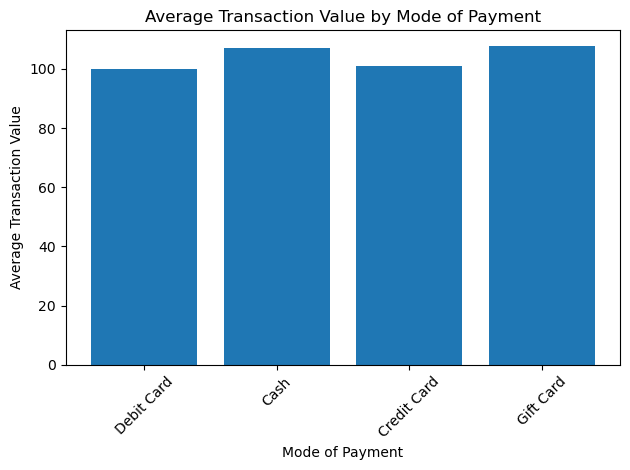

In [12]:
avg_tran = pd.DataFrame(data)

print("Average transactions by payment type:")
display(avg_tran)

# Plotting
# Create a bar chart
fig, ax = plt.subplots()
ax.bar(avg_tran["mode_of_payment"], avg_tran["average_transaction_value"])

# Set the chart title and axis labels
ax.set_title('Average Transaction Value by Mode of Payment')
ax.set_xlabel('Mode of Payment')
ax.set_ylabel('Average Transaction Value')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

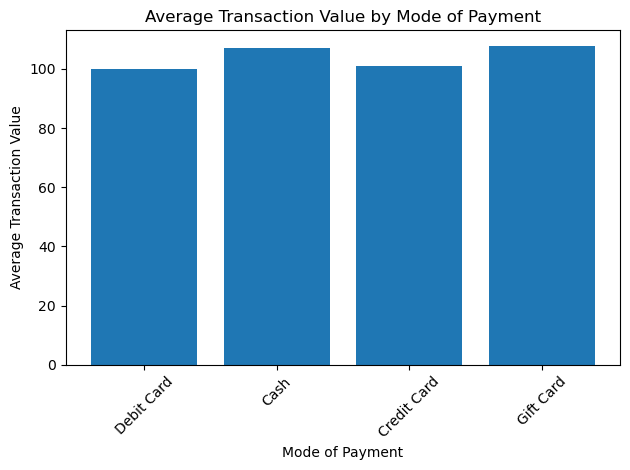

In [5]:
import matplotlib.pyplot as plt


# Extract the mode of payment and average transaction value into separate lists
modes_of_payment = [d['mode_of_payment'] for d in data]
avg_transaction_values = [d['average_transaction_value'] for d in data]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(modes_of_payment, avg_transaction_values)

# Set the chart title and axis labels
ax.set_title('Average Transaction Value by Mode of Payment')
ax.set_xlabel('Mode of Payment')
ax.set_ylabel('Average Transaction Value')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()